# Canopy Openness package working example

### This notebook tests the ImageLoad and FishEye modules in the in-development package

This notebook provides a sample workflow for users using the CanopyOpenness package.

As the package is in development, this notebook will be updated as new modules are written.

Currently the notebook provides a working example for ImageLoad, FishEye, and CanopyOpenness modules.

*The output of ImageLoad is a hemispheric photo transformed to black-and-white based on thresholding*

Here white=sky and black=canopy.

*The output of FishEye is the same photo but with calculations of center circle coordinates for fisheye lens*

---

The workflow for the user is as follows:

  - 1) Import package in development and load ImageLoad and FishEye modules
  - 2) Set logging level to debug from loguru
  - 3) Define user inputs for ImageLoad (filepath and filename)
  - 4) Run the ImagePrep class in ImageLoad module 
  - 5) Check that output is correct by running functions to output images
  - 6) Run FishEye class in FishEye module using the output from ImagePrep as input
  - 7) Check output is correct by displaying center coordinates and plotting circle around fisheye lens
  - 8) Run the CanopyOpenness class in CanopyOpenness modul
  - 9) Check output of gap fraction profiles for 89 sub-circles by displaying it
  - 10) Check canopy openness calculation by running openness module


In [3]:
#Importing Packages
import CanopyOpenness
from CanopyOpenness import ImageLoad
from CanopyOpenness import FishEye
from CanopyOpenness import CanOpen
import numpy as np
import skimage #image manipulation
import matplotlib.pyplot as plt #plots
import os

In [4]:
#Setting logging level to debug
CanopyOpenness.set_loglevel("DEBUG")

## Running ImageLoad module

This will load an image and output a thresholded bw photo

In [17]:
#Defining user input
filepath = "./sample_photos/Batch_Test/" #where photos are stored
filename = "JZ.015A.29Jan2012.EV-2.MF.JPG" #one photo

In [18]:
#Saving object from ImagePrep class in ImageLoad module
#This will give us the loaded image, blue transformed, and bw transformed

#takes 5 arguments: 
#     filepath or folder where pictures are placed
#     filename or the name of the photo file
#     threshold value for image, manual input, defaults to 0, if other value chosen, overrides algorithm in method
#     threshold method for image, defaults to otsu algorithm, can also be isodata algorithm
#     option to plot image or not, defaults to False

img = ImageLoad.ImagePrep(filepath, filename,threshold_method="isodata",plot=True)

06:51 | DEBUG   | imageLoad       | loaded image: JZ.015A.29Jan2012.EV-2.MF.JPG


(2592, 3888, 3)

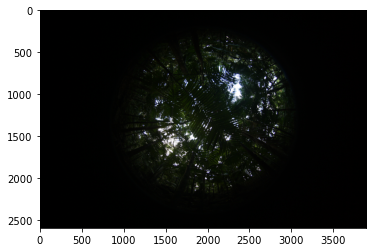

In [19]:
#Checking output of regular image load and logging message
og = img.imageLoad()
og.shape

06:51 | DEBUG   | BluePic         | converted image to blue...


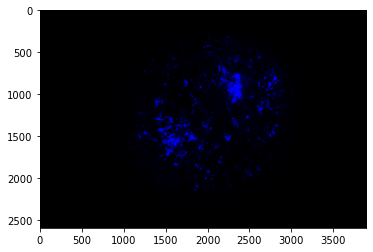

In [20]:
#Checking output of blue-transformed image and logging message
blue= img.BluePic()

Threshold =  0.03 Method =  isodata
06:51 | DEBUG   | bwPic           | converted image to BW ...threshold...


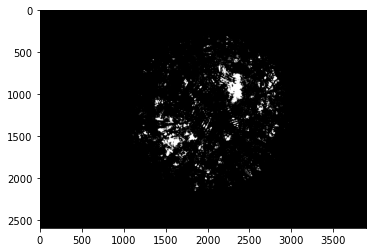

In [21]:
#Checking output of bw-transformed image and logging message, will also display the threshold value and method used
bw = img.bwPic()
#print('shape:',bw.shape) #shape (this is just to check that it's a numpy array still)
#print('dimensions:',bw.ndim) #amount of dimensions (this is just to check that it's still a 2D array)

## Running FishEye module
This will take the img.bwPic output from ImagePrep above.  
It will then calculate the coordinates of the circle of fisheye lens and set them into the image array

In [22]:
#Running FishEye class on the bw pic
fish = FishEye.FishEye(bw,plot=True) #option to plot or not added (defaults to false)

center circle coordinates = ( 1944 , 1296 ) radius =  1146
06:51 | DEBUG   | CircleCoords    | Set center circle...fisheye...coordinates


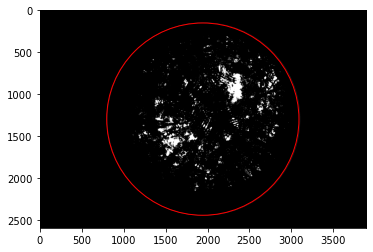

In [23]:
#checking object returned from CircleCoords function
image=fish.CircleCoords() #Calculates the circle coordinates within the image array and returns those

#Checking that dimensions of image array are intact
#print('shape:',image[0].shape) #shape (this is just to check that it's a numpy array still)
#print('dimensions:',image[0].ndim) #amount of dimensions (this is just to check that it's still a 2D array)

06:51 | DEBUG   | SetCircle       | Manually setting fisheye coordinates
center circle coordinates = ( 1944 , 1296 ) radius =  816


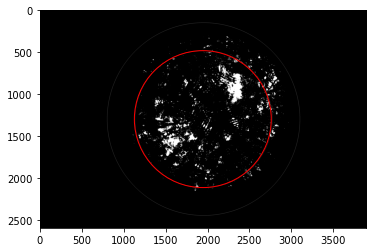

In [24]:
#checking object returned from SetCircle function when manually set coordinates
circle_draw = fish.SetCircle(cr=816) #returns bw image array with center coordinates (x,y, and radius)

#checking shape remained the same
#circle_draw[0].shape #works! (this is just to check that it's a numpy array still) 

06:51 | DEBUG   | SetCircle       | Manually setting fisheye coordinates
center circle coordinates = ( 1944 , 1296 ) radius =  1146


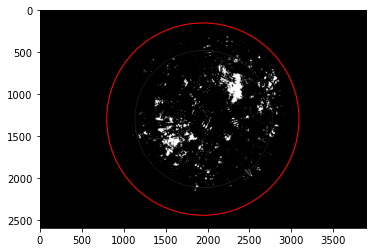

In [25]:
#checking that SetCircle returns same image as CircleCoords if no manual inputs are given
circle_draw2 = fish.SetCircle() #works!

## Running CanopyOpenness module
This will take the image from FishEye module above that has bw photo with center fisheye circle coordinates and radius. 
It will then calculate the proportion of sky (i.e. white) in 89 sub-circles within the fisheye circle,
and then use that and the total area of the fisheye circle to calculate the total area of sky (i.e. openness) in the photo. 

In [26]:
#testing gap fraction calculation 
gfp = CanOpen.CanOpen(image) #running module

In [27]:
gaps=gfp.calc_gap_fractions() #outputting array of proportion sky for each sub-circle
gaps[:10] #displaying slice of array

06:51 | DEBUG   | calc_gap_fractions | Calculating gap fraction profile for sub-circles


array([0.        , 0.01388889, 0.01388889, 0.04444444, 0.07222222,
       0.02222222, 0.13611111, 0.07777778, 0.05555556, 0.03333333])

In [28]:
openness=gfp.openness()

06:51 | DEBUG   | openness        | Calculating openness for single hemispheric photo
Canopy Openness =  0.06761272166307414
